In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.svm import SVC
import warnings 
import math
warnings.filterwarnings('ignore')
import category_encoders as ce
#!pip install category_encoders



In [2]:
df = pd.read_csv(r"C:\Users\priya\Downloads\SVM\SVM\mushroom.csv")

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df = df.drop_duplicates(keep='first')

In [5]:
df.shape

(976, 26)

In [6]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_col

In [8]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [9]:
df.drop(columns='Unnamed: 0',inplace=True)

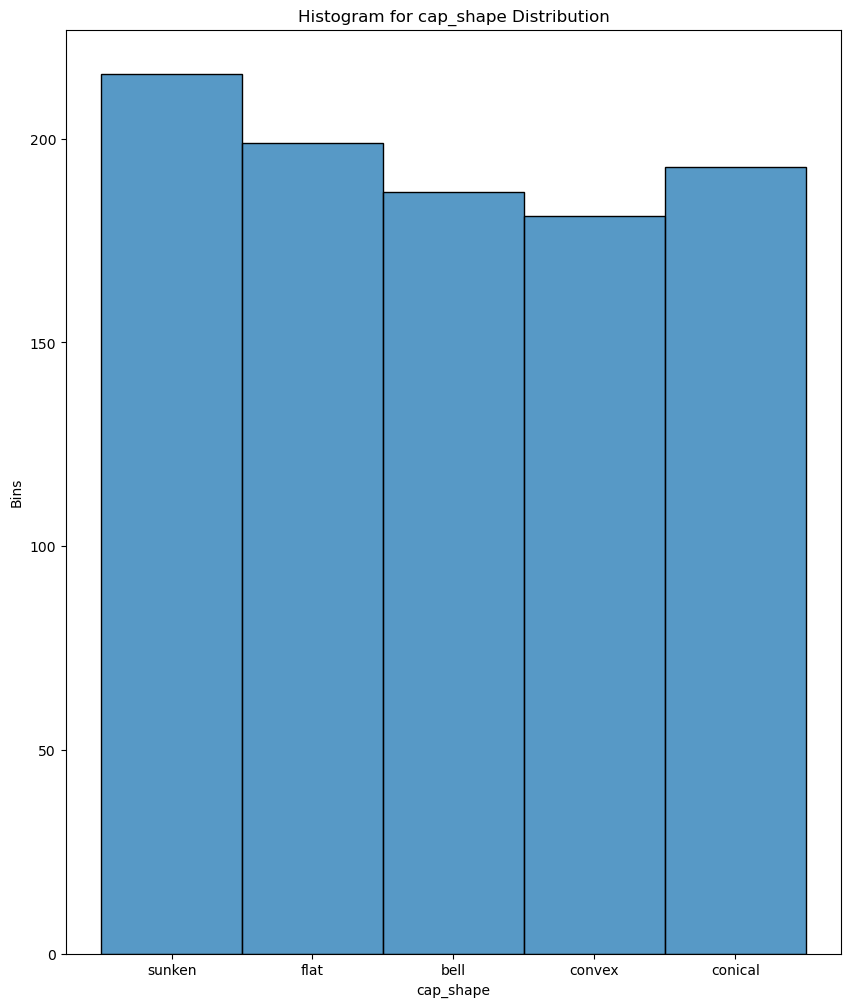

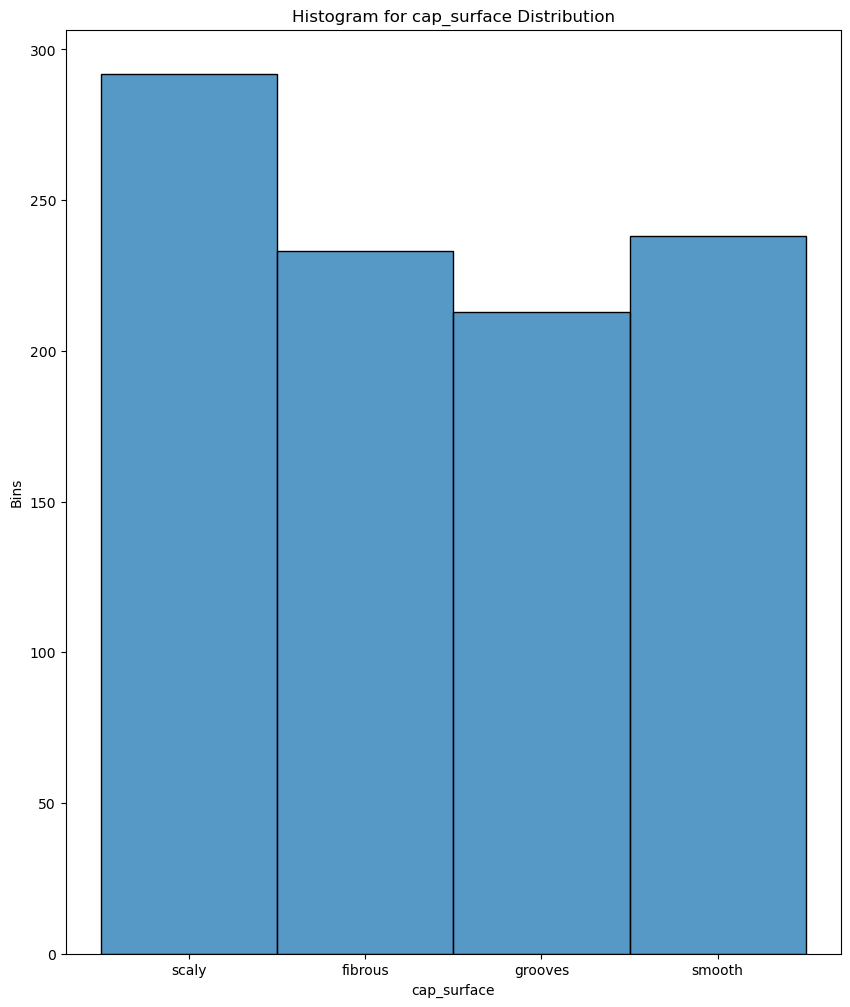

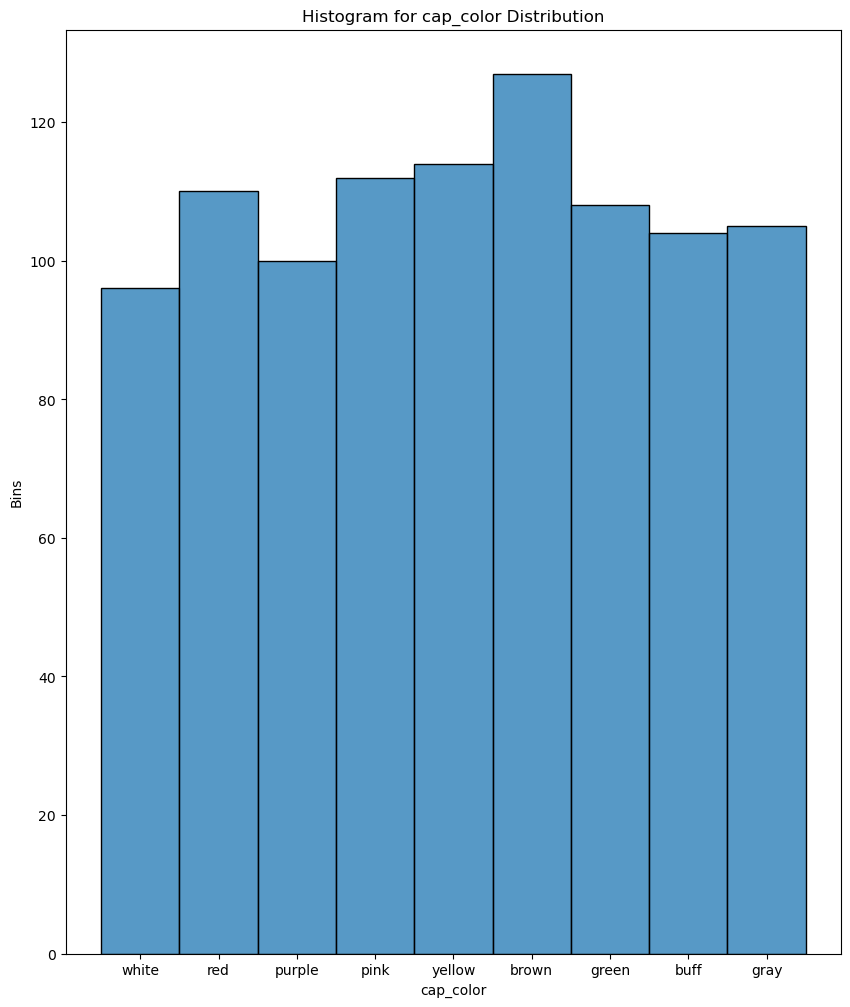

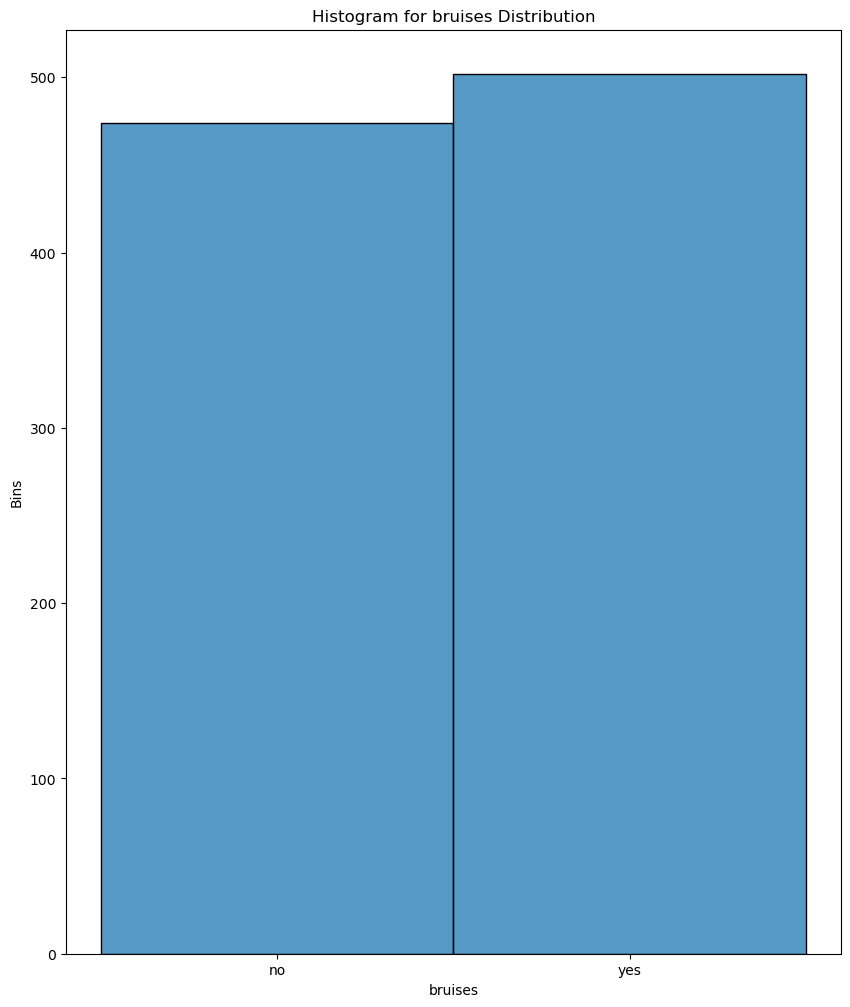

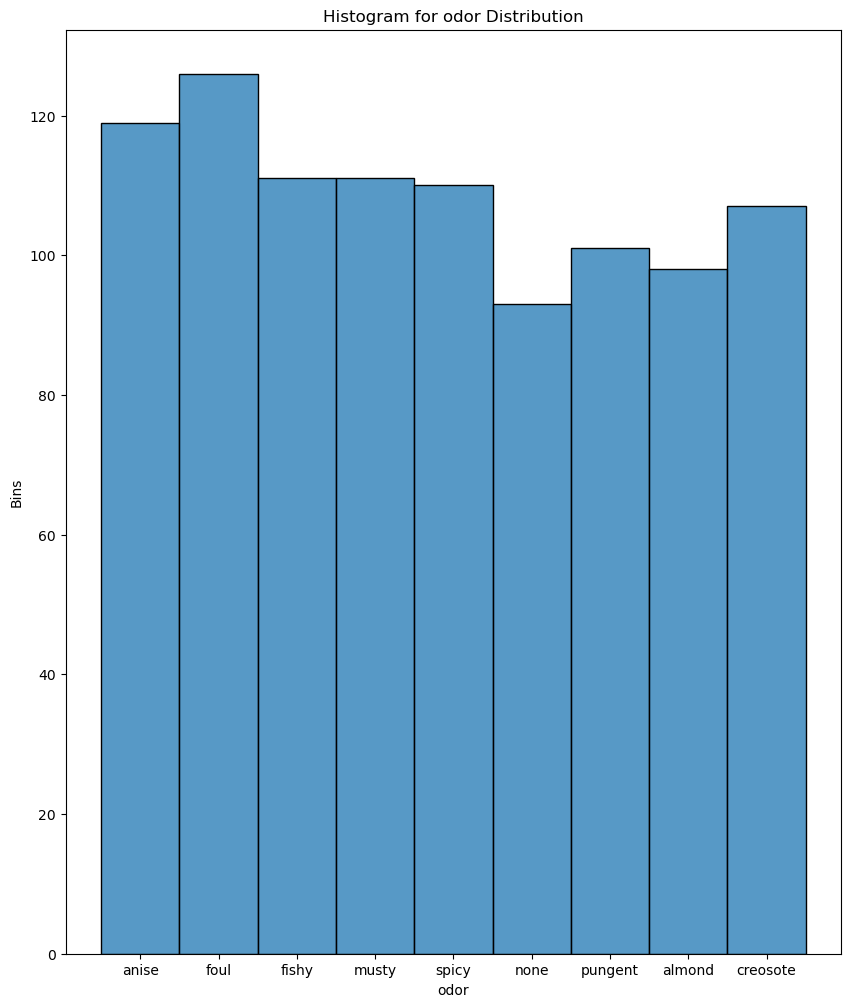

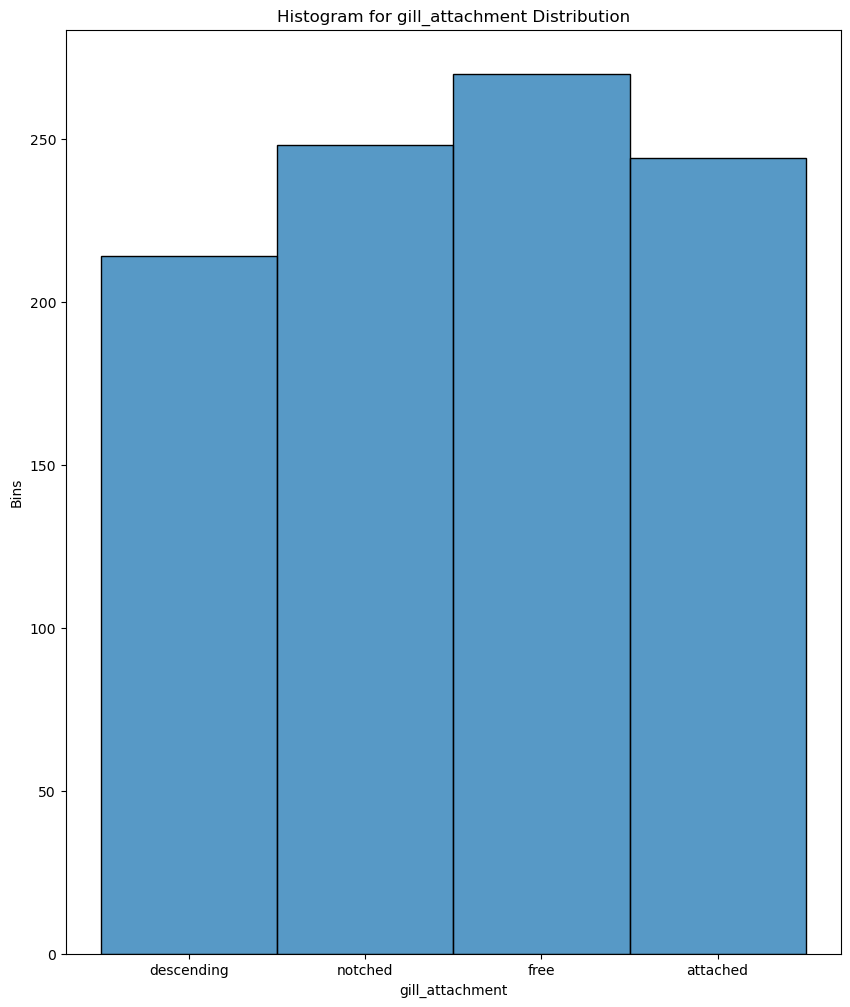

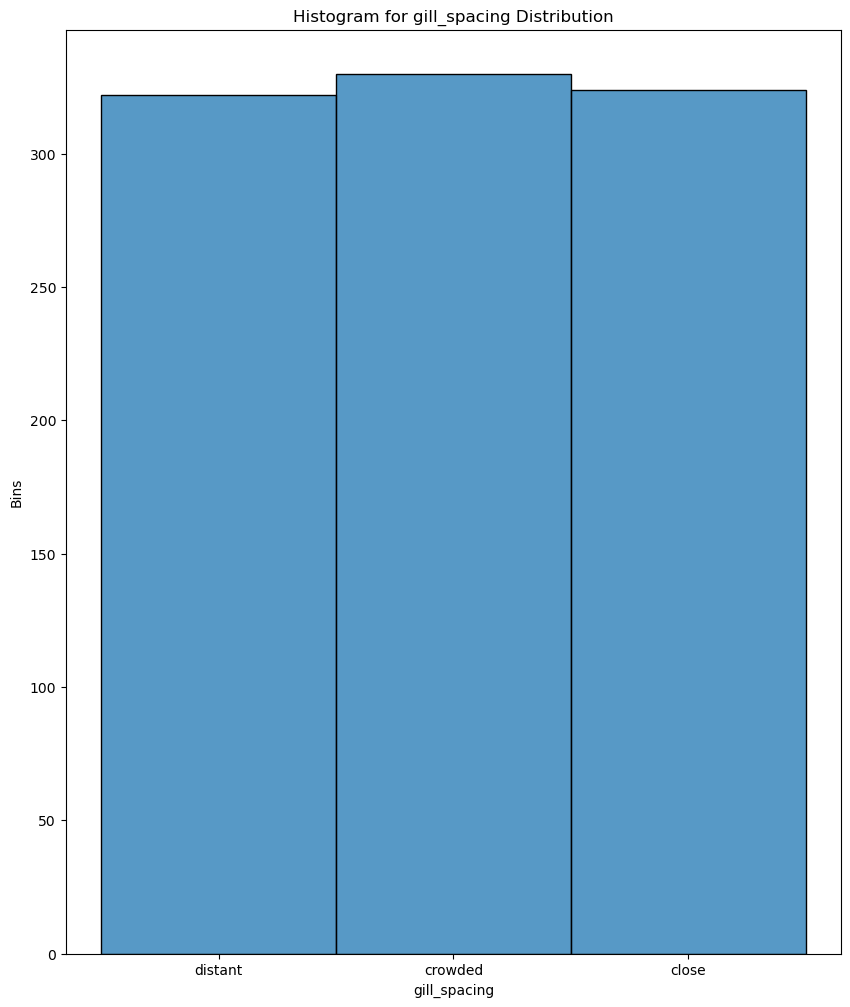

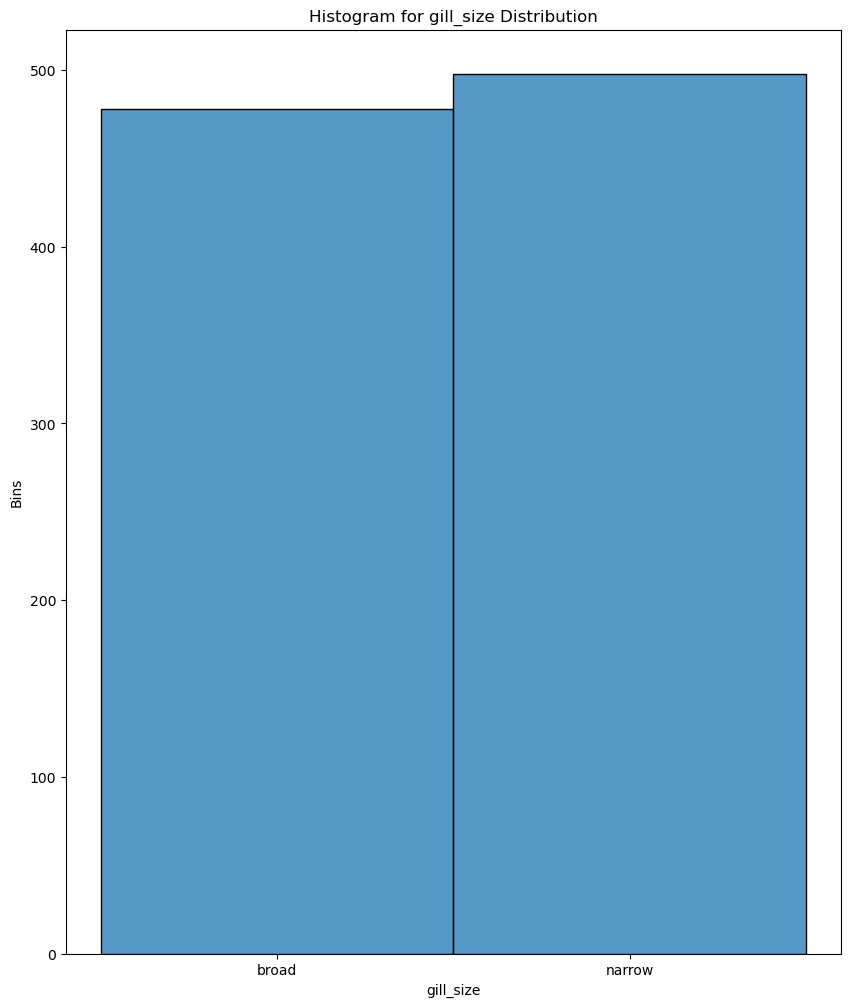

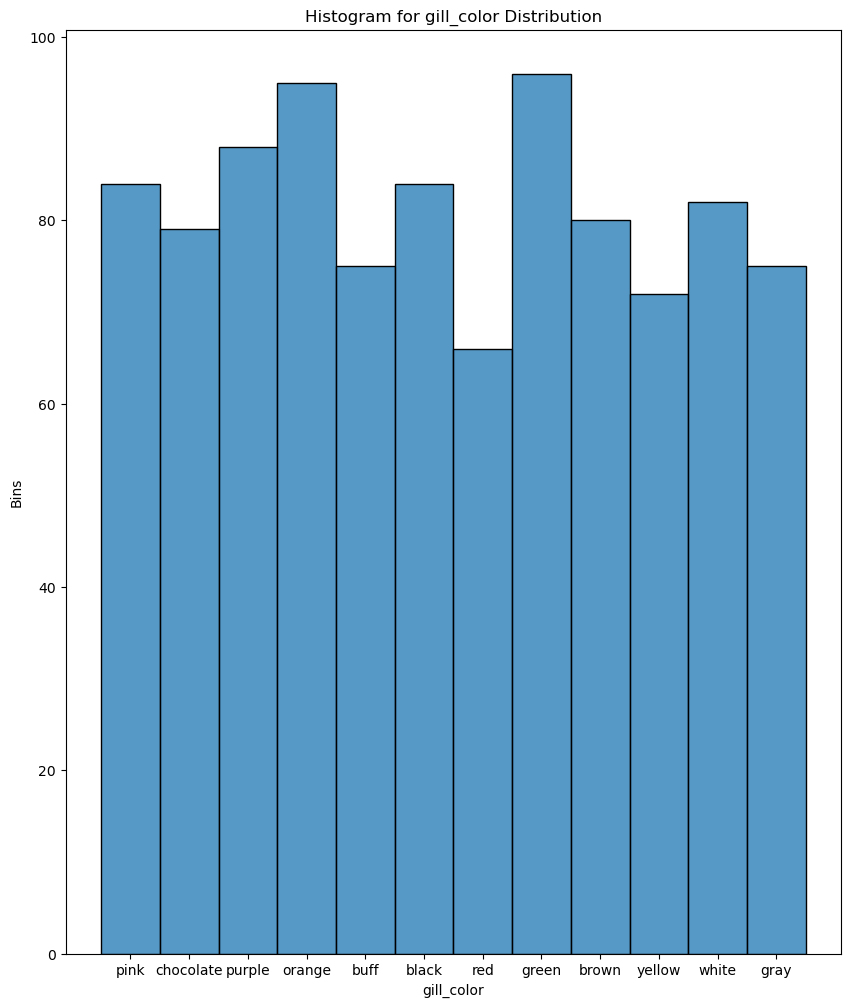

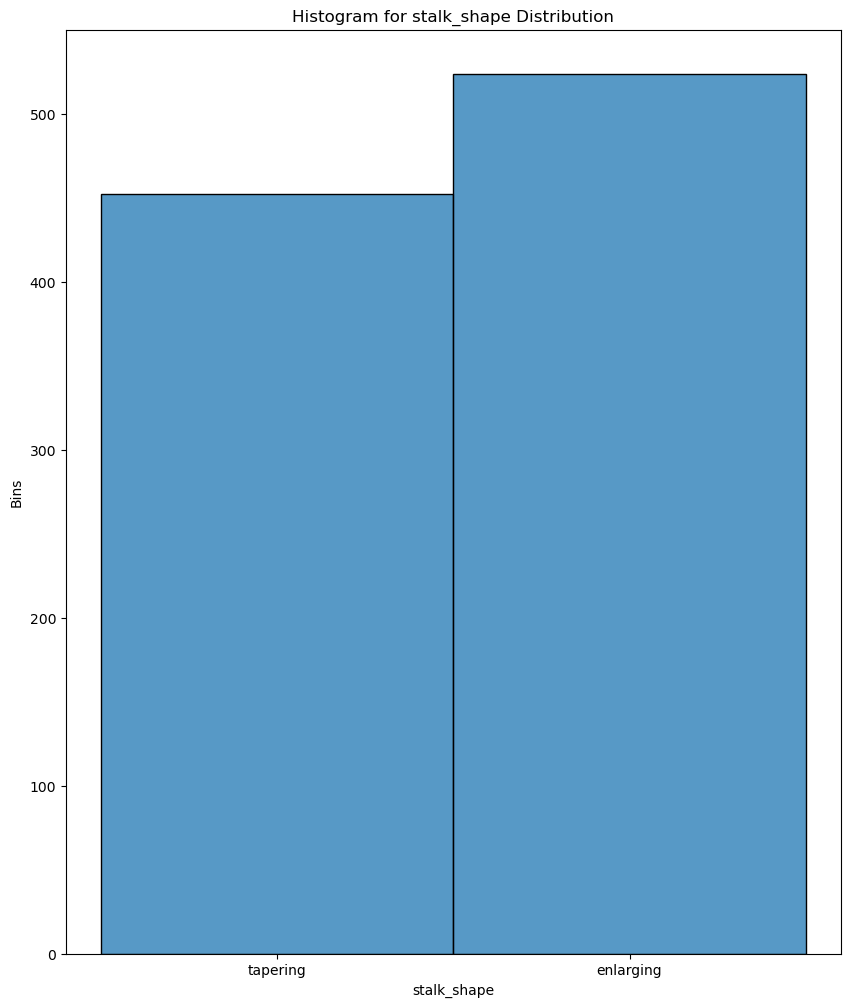

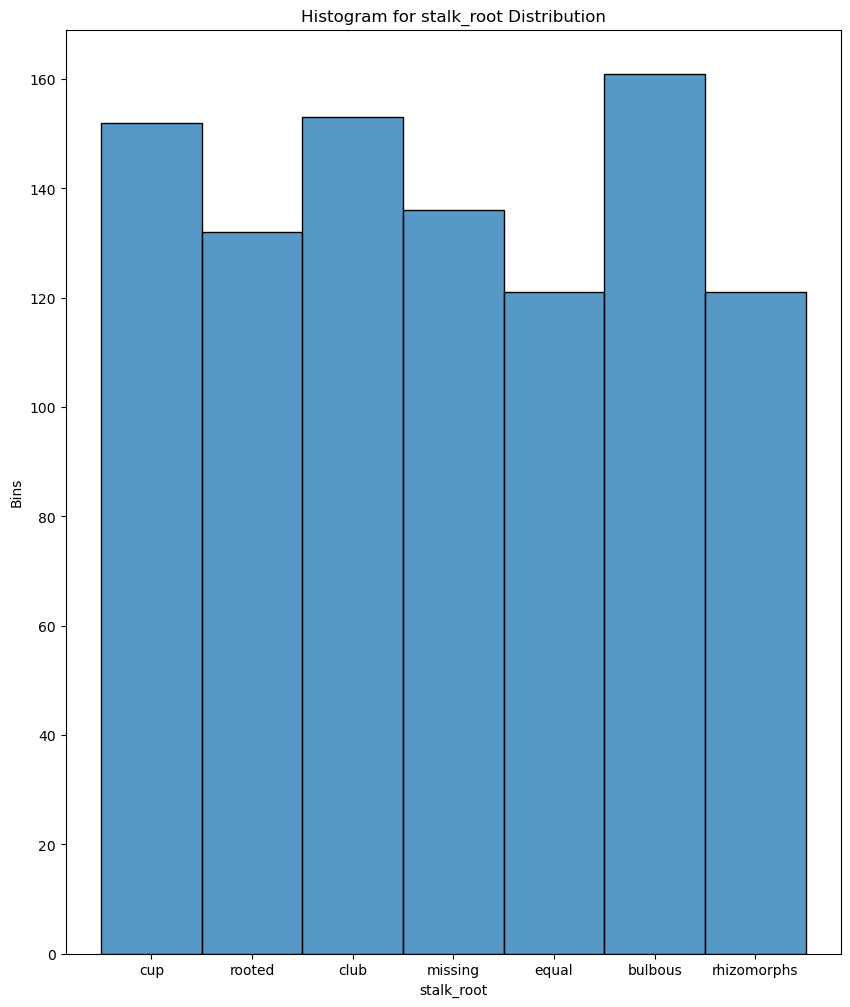

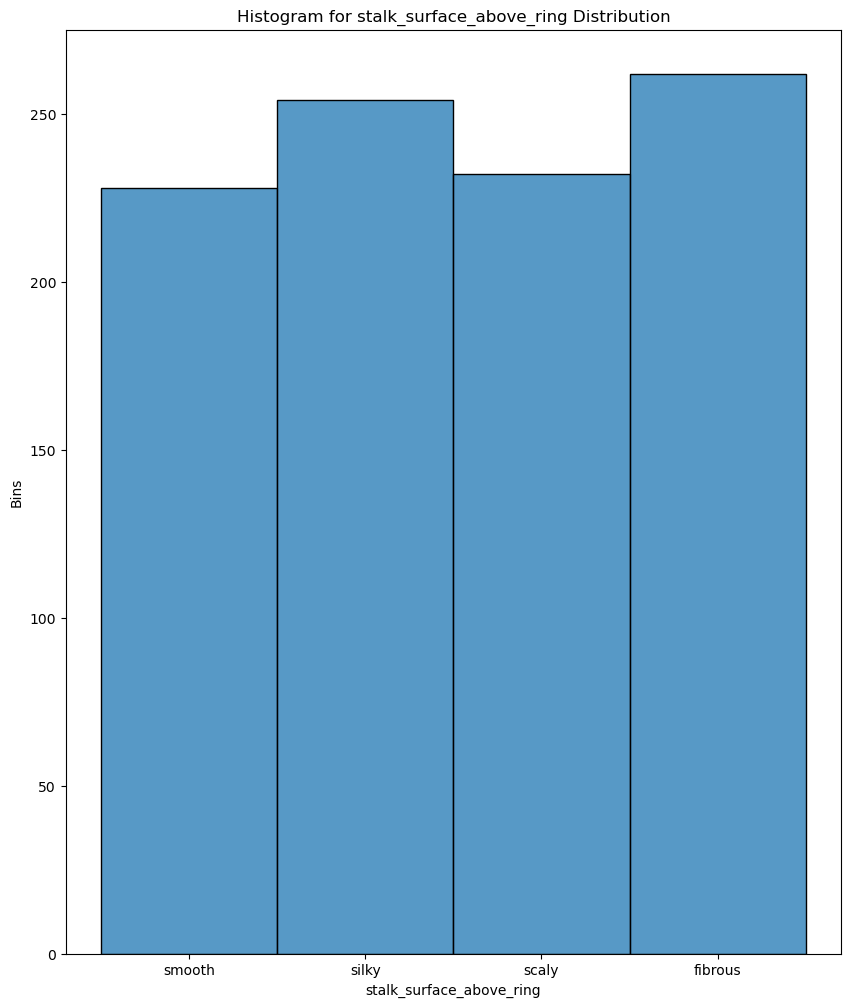

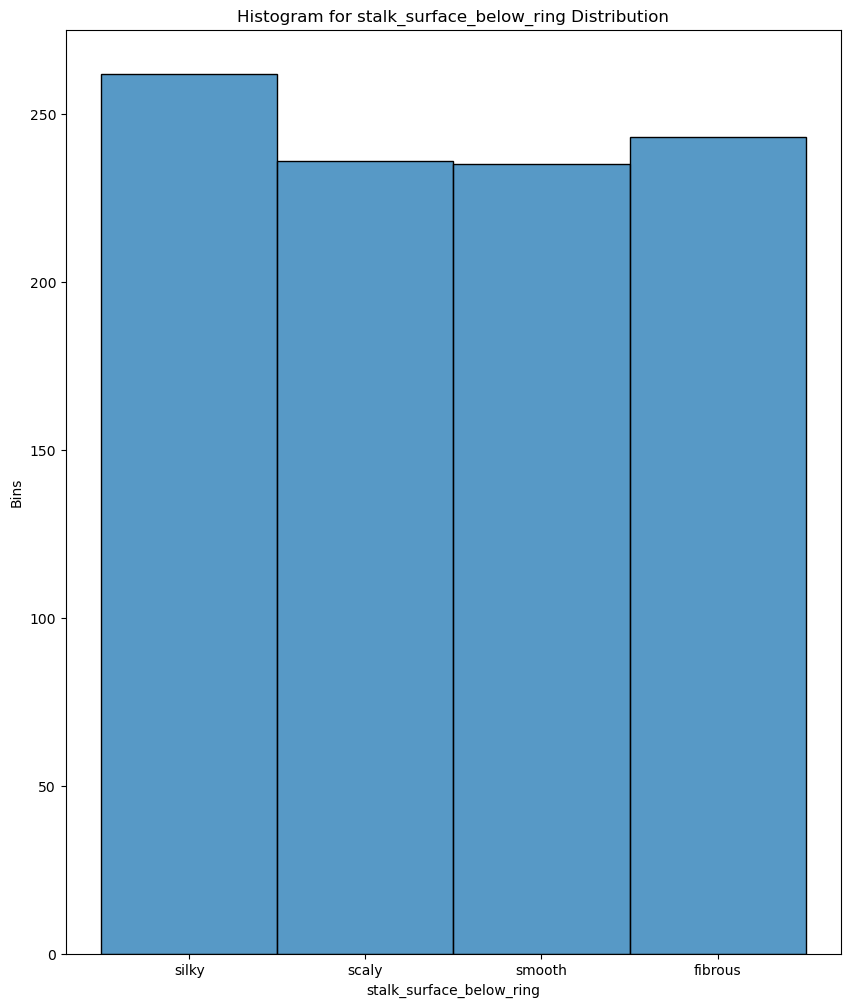

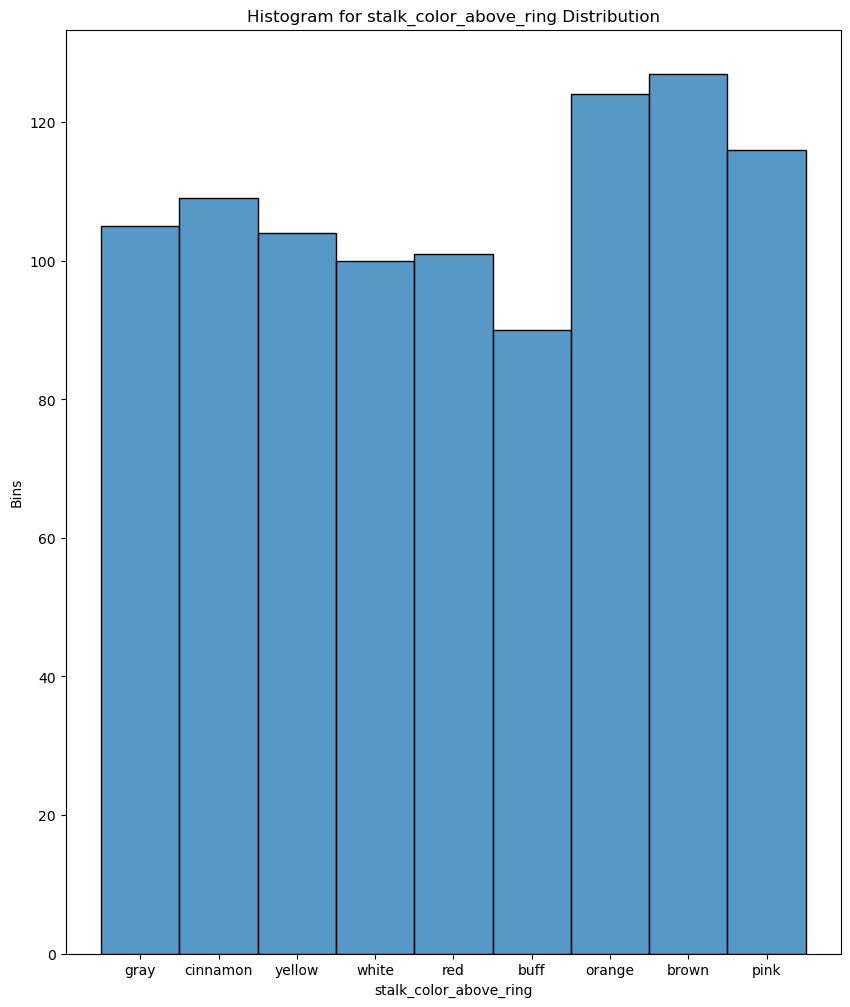

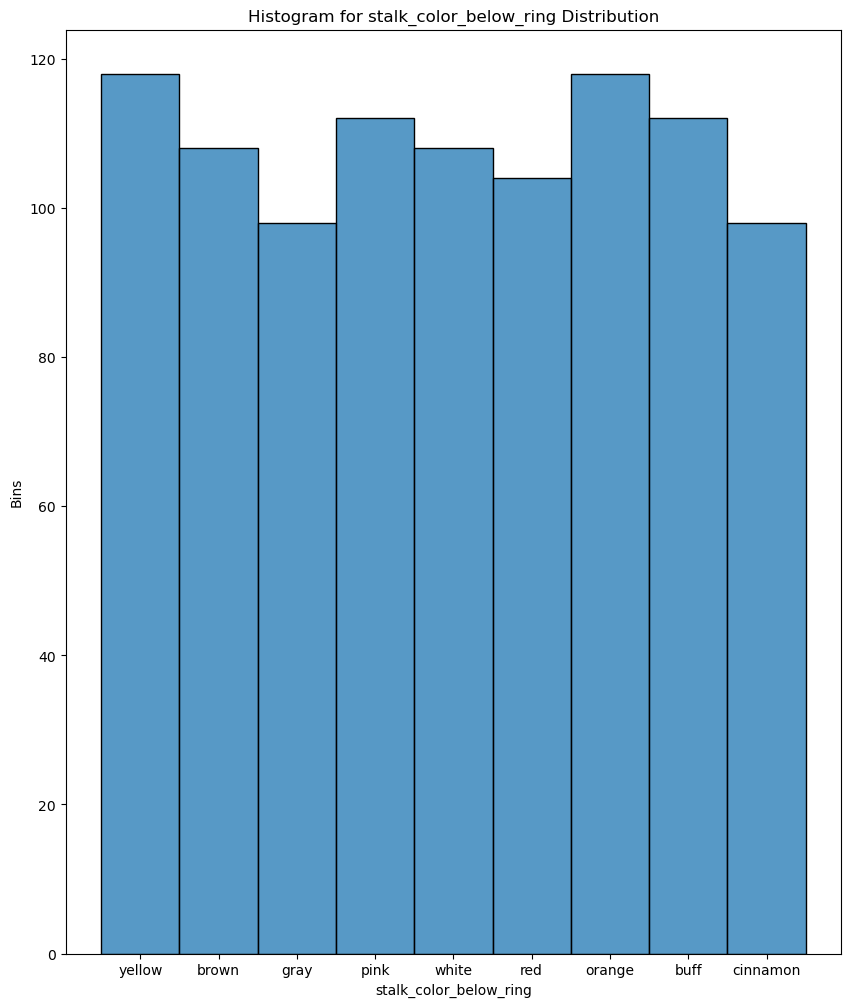

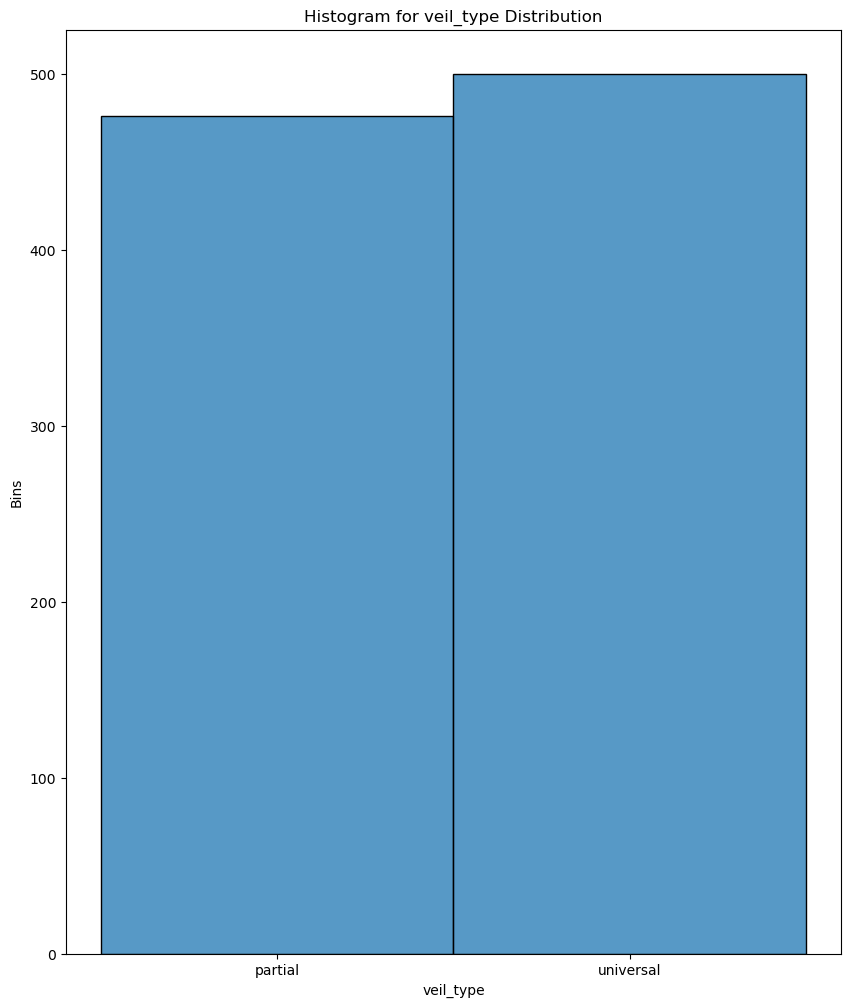

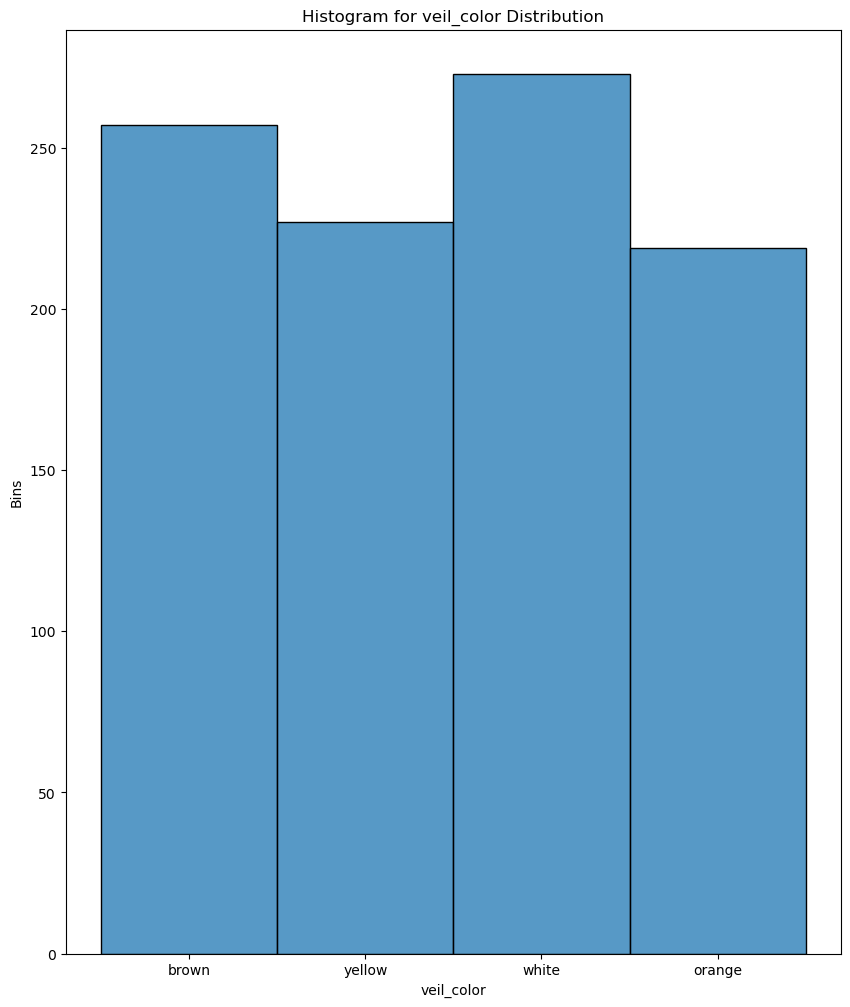

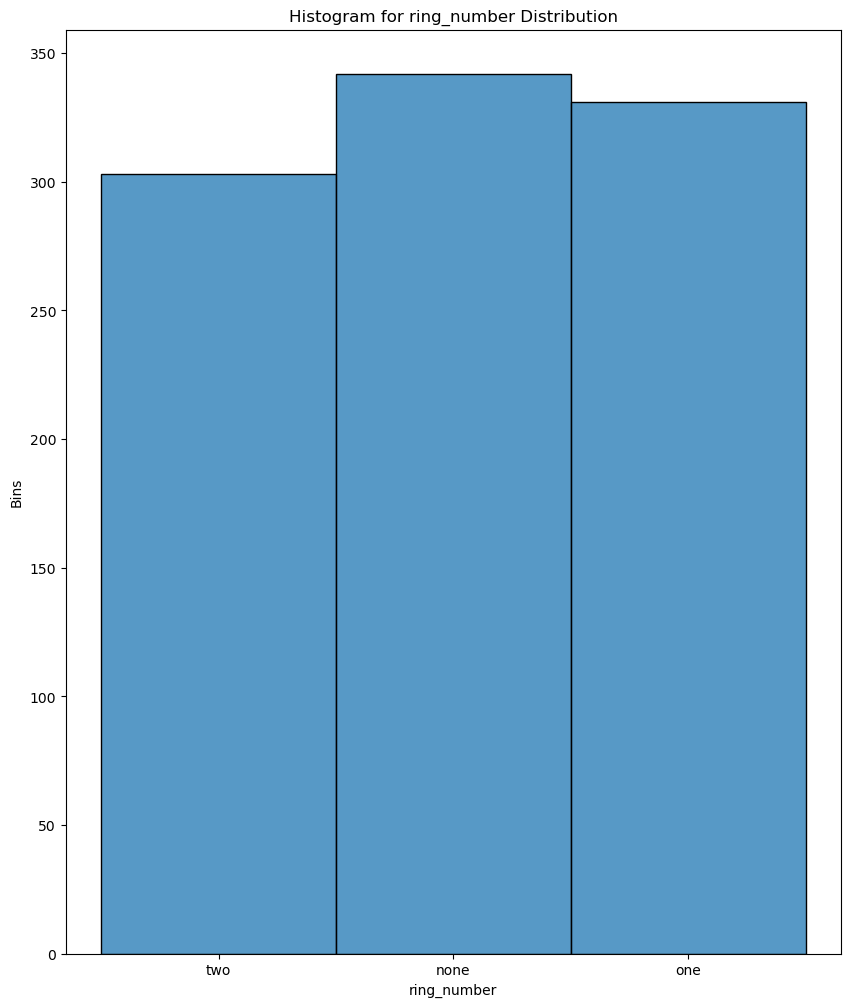

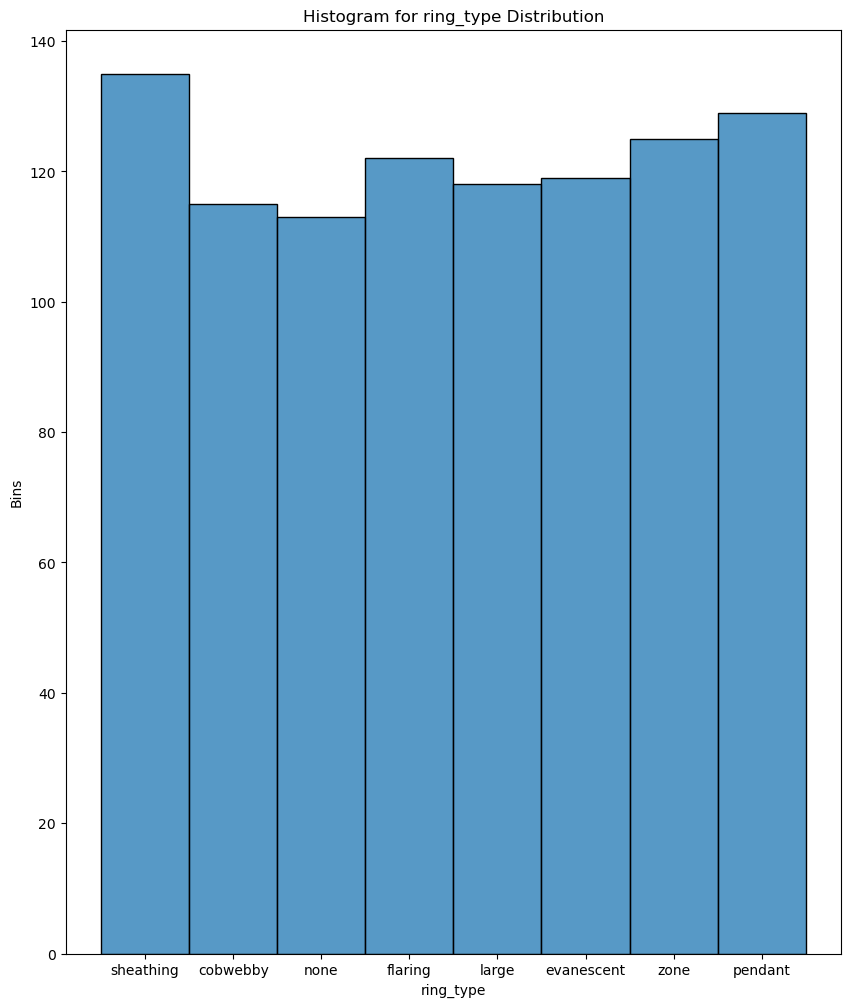

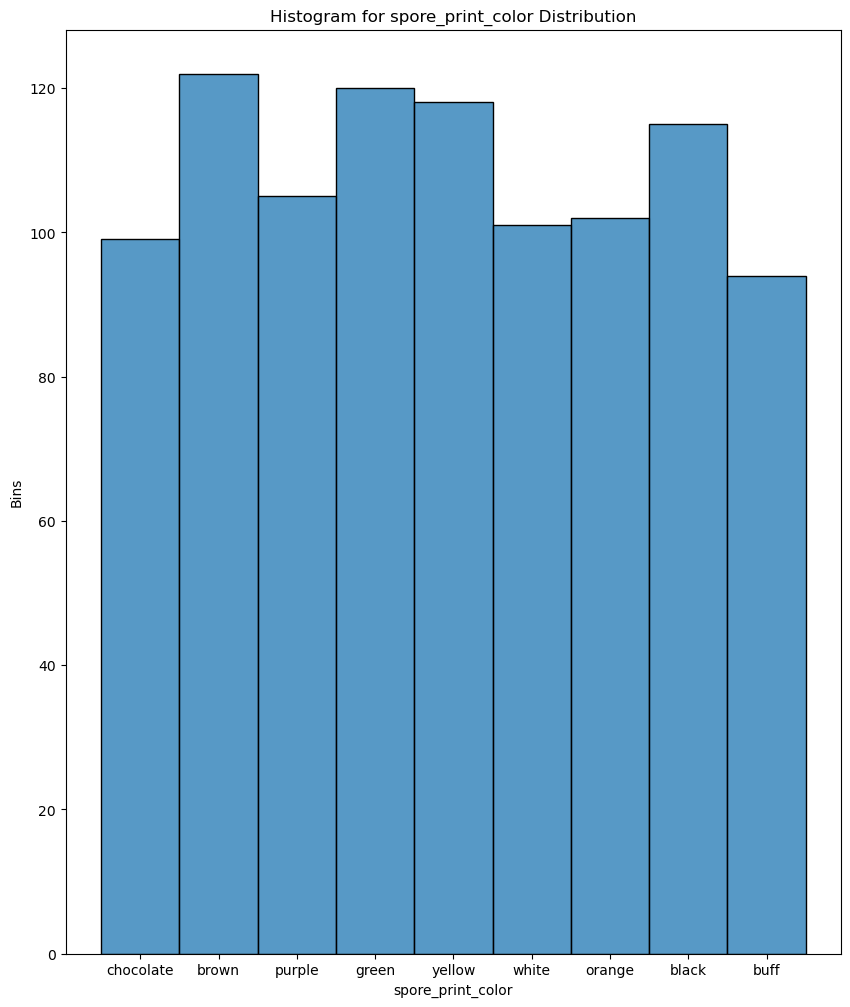

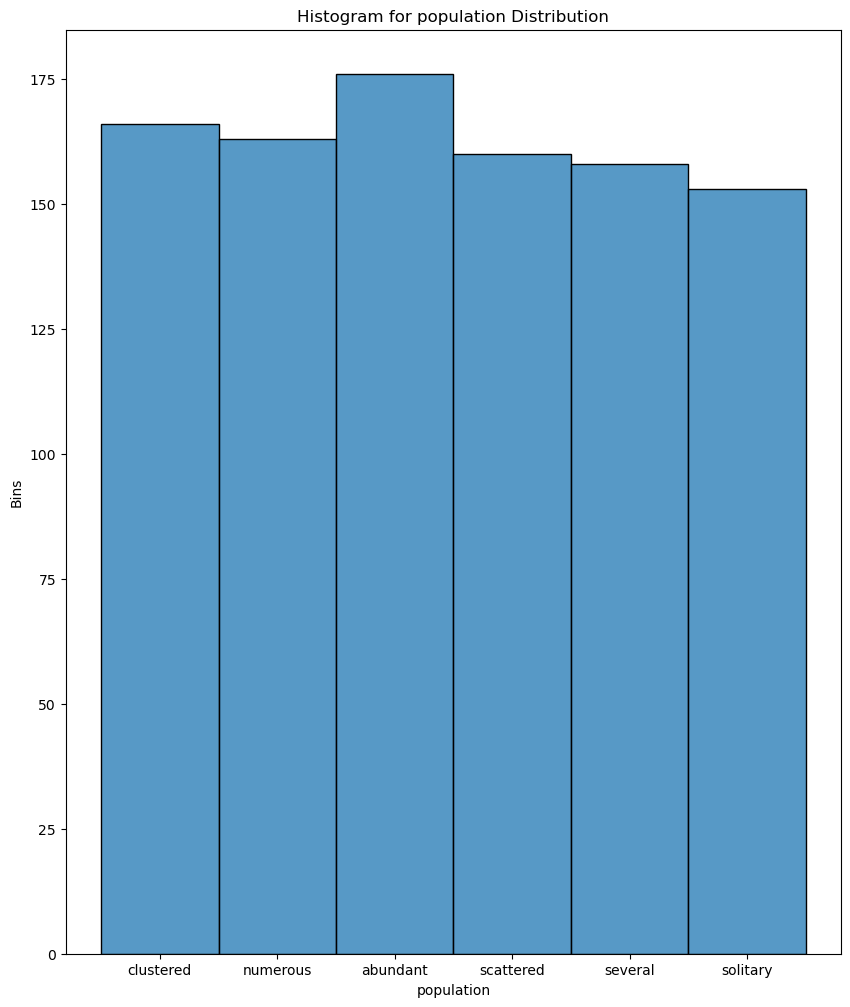

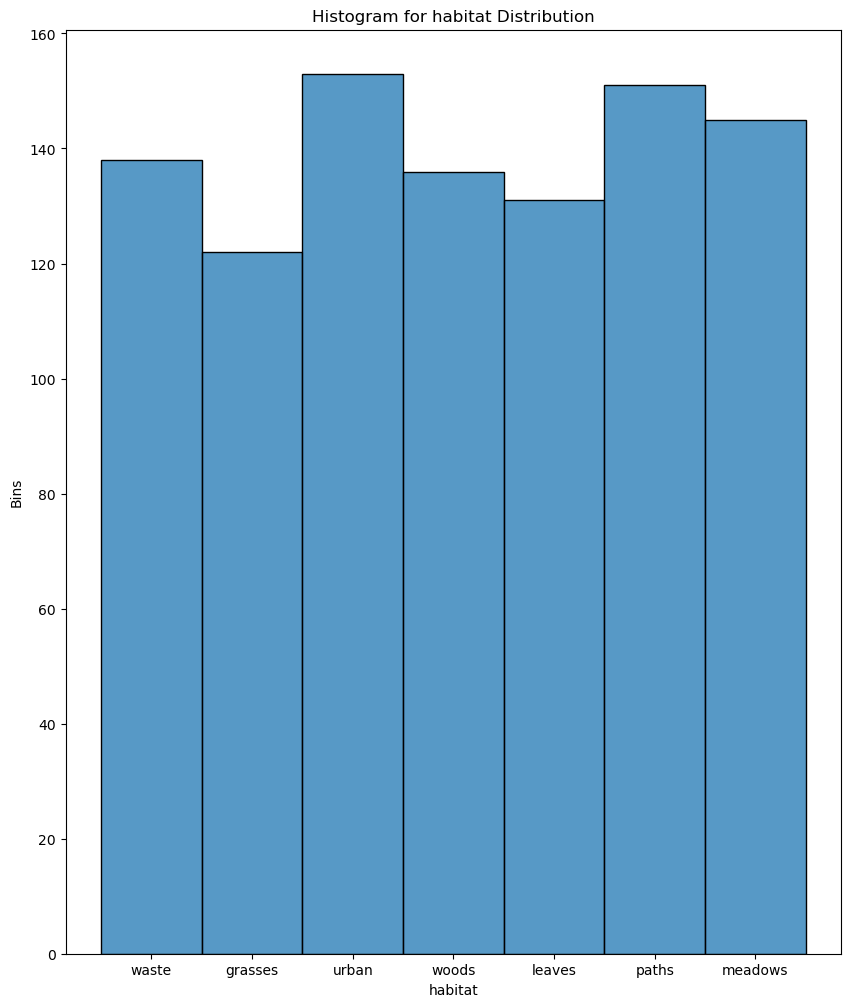

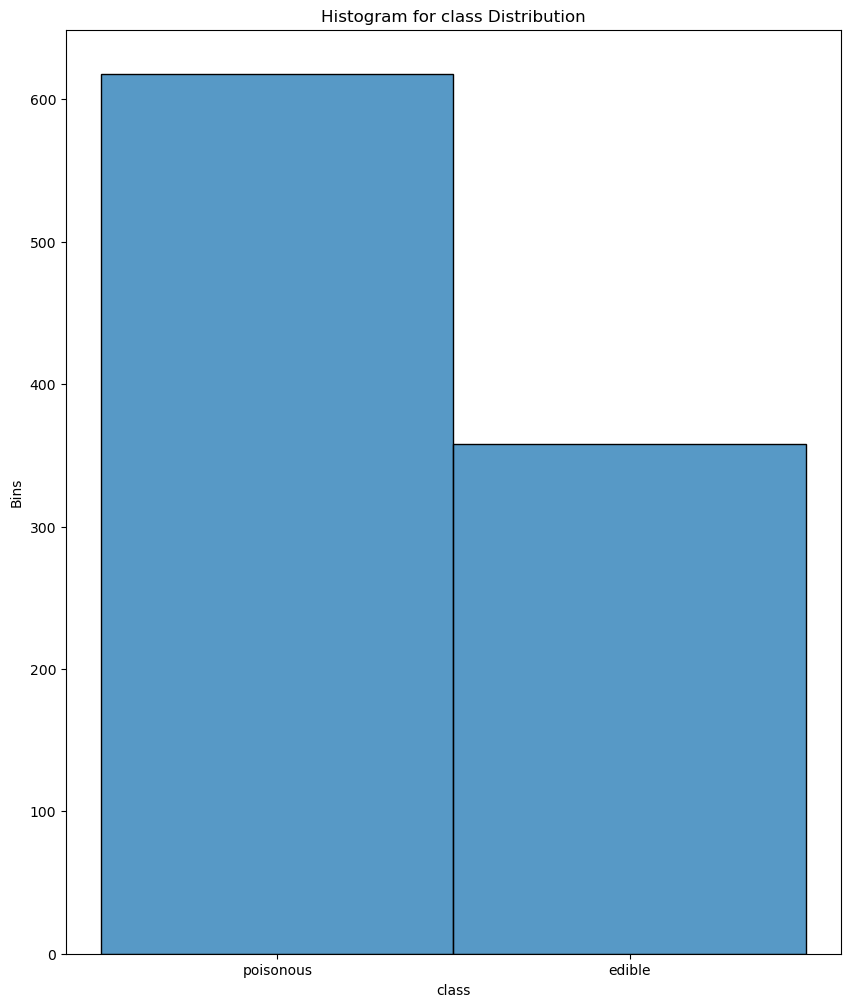

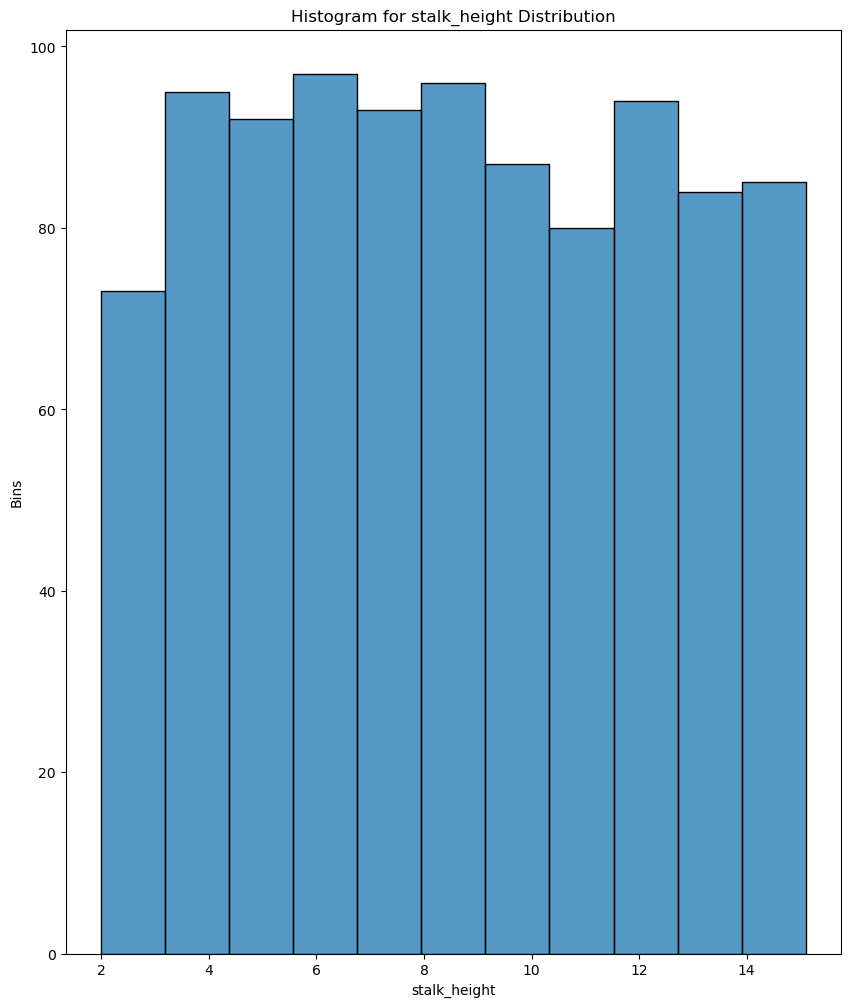

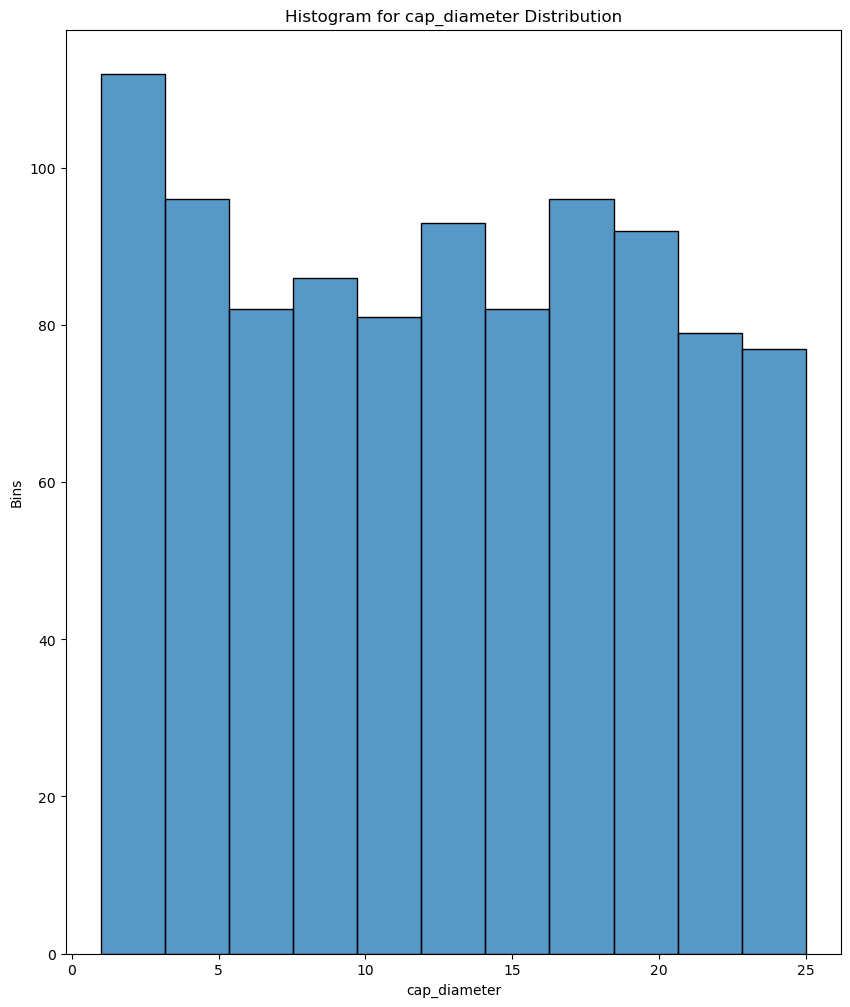

In [10]:
#Histogram for visualizing the feature disribution 
for i,column in enumerate(df.columns):
    plt.figure(figsize=(10,12))
    sns.histplot(df,palette='viridis',legend=True,x=df[column])
    plt.xlabel(column)
    plt.ylabel('Bins')
    plt.title(f'Histogram for {column} Distribution')
    plt.subplot()

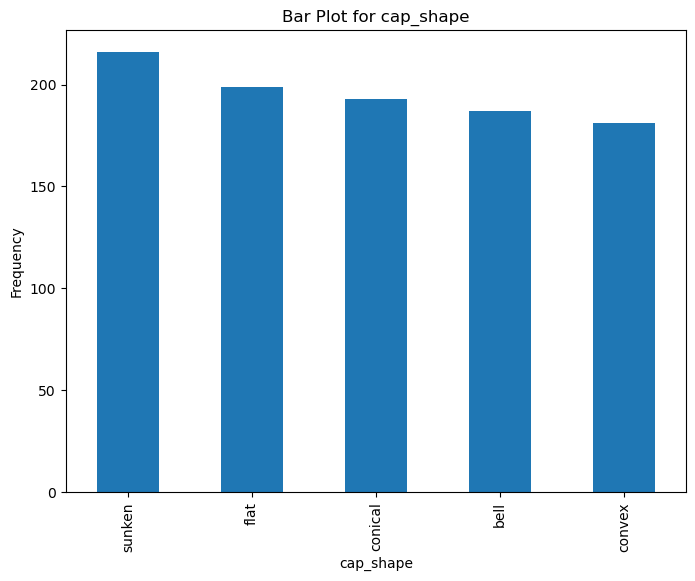

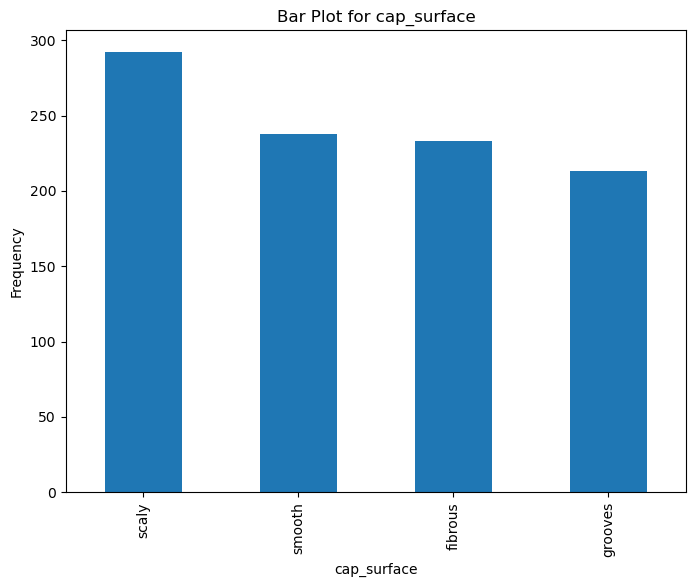

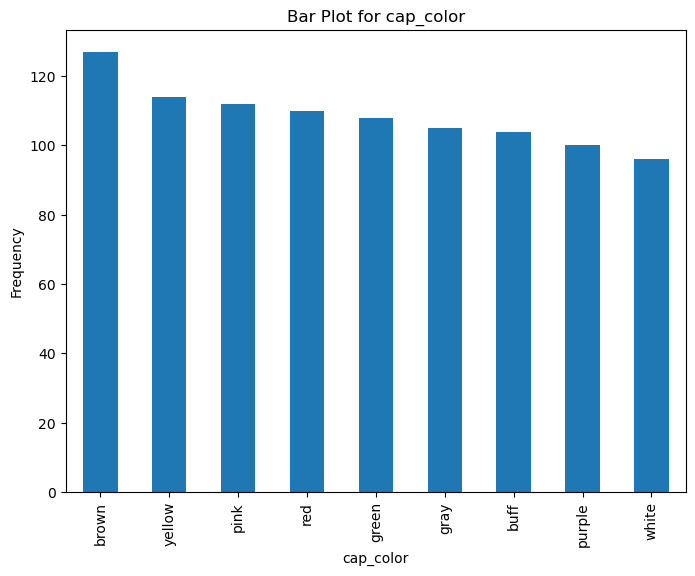

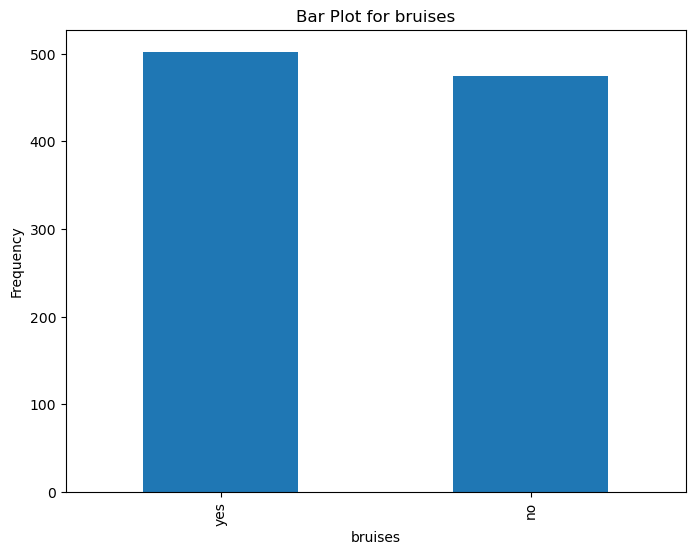

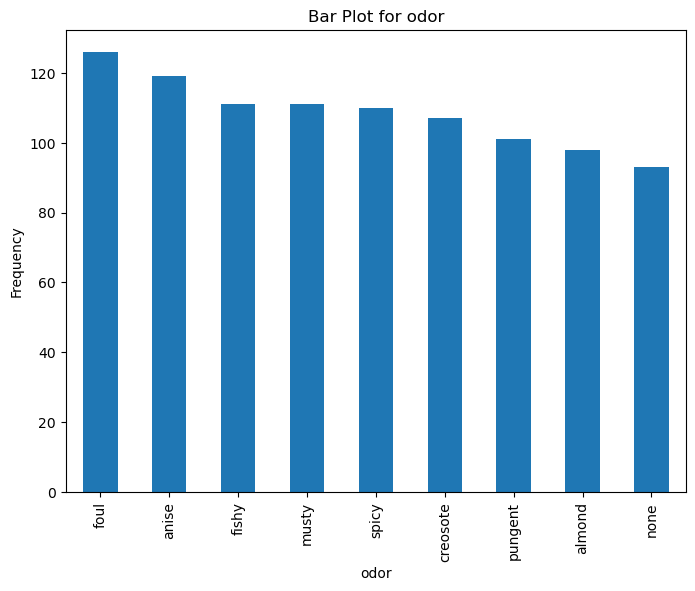

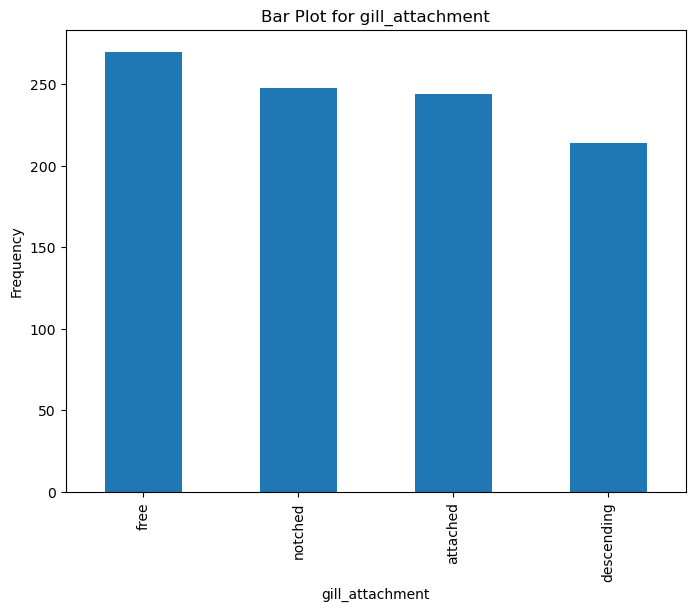

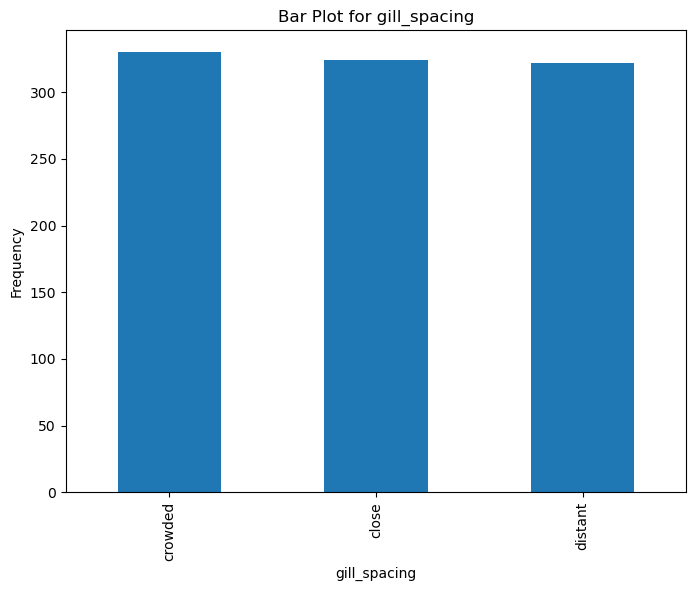

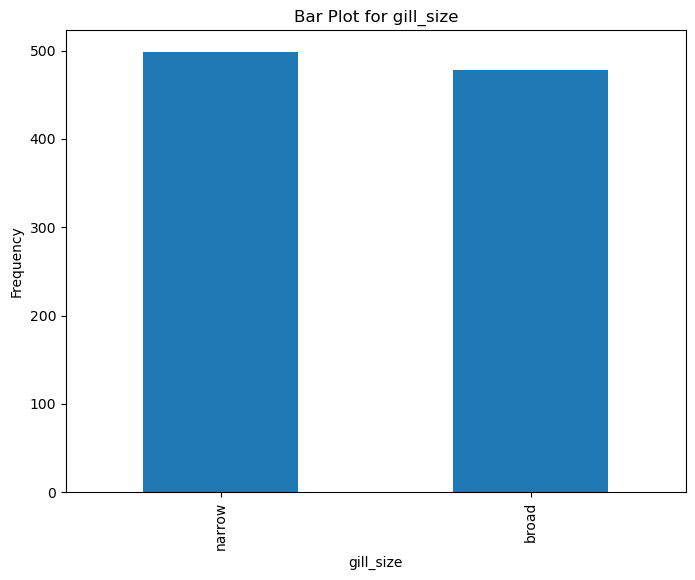

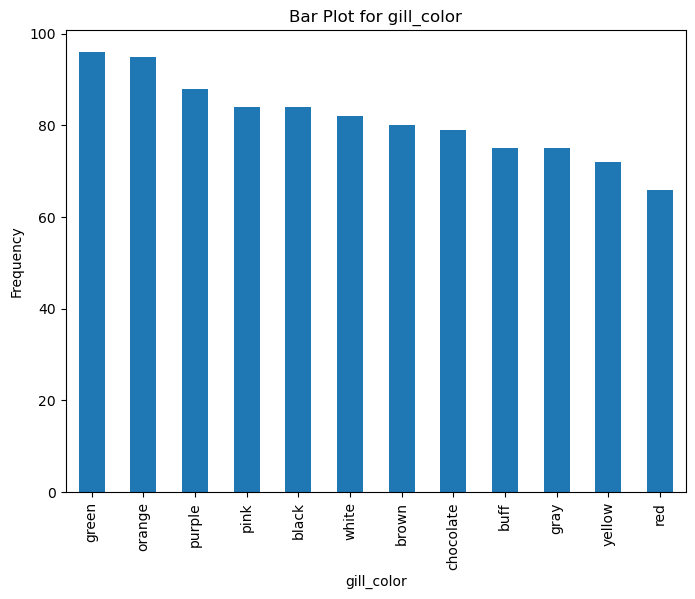

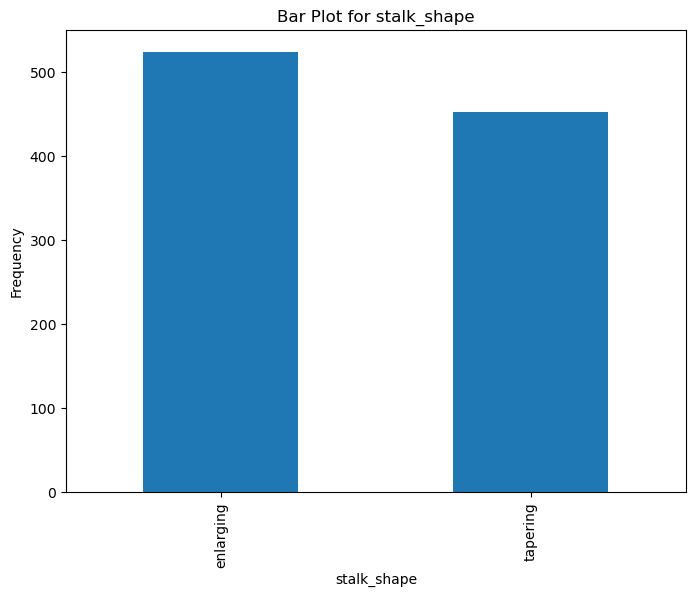

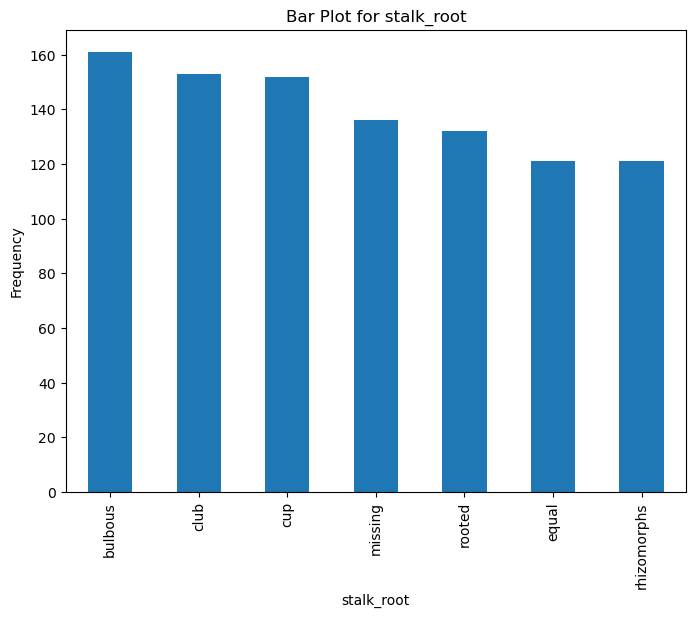

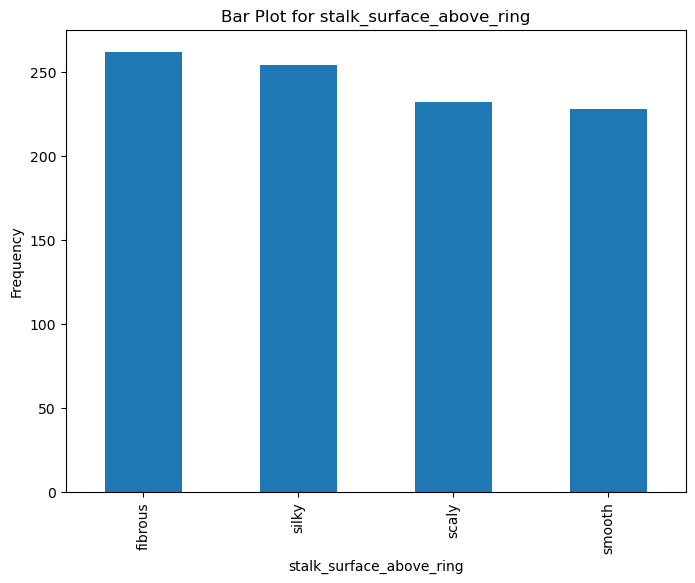

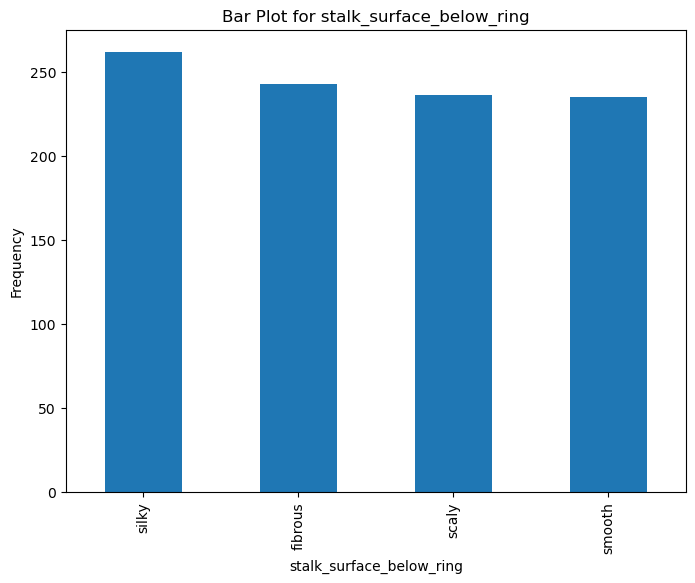

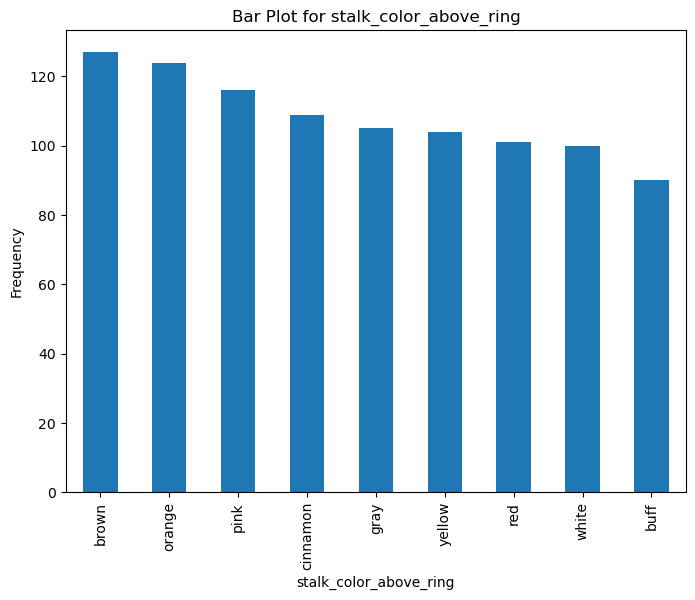

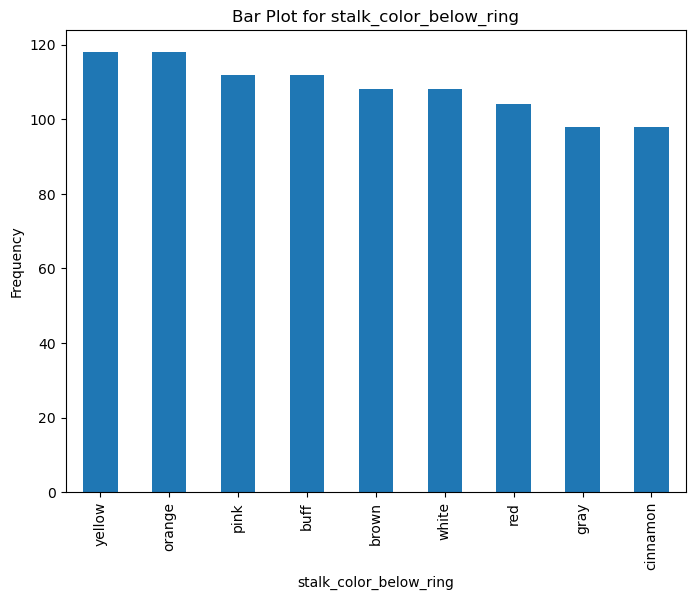

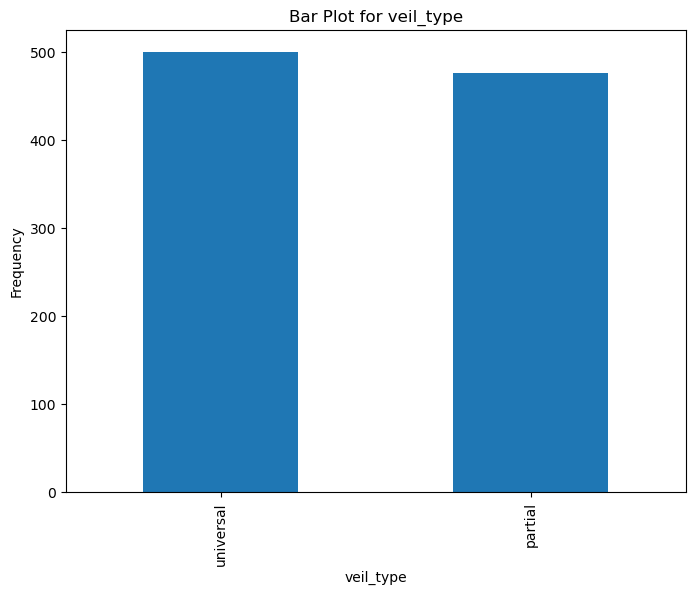

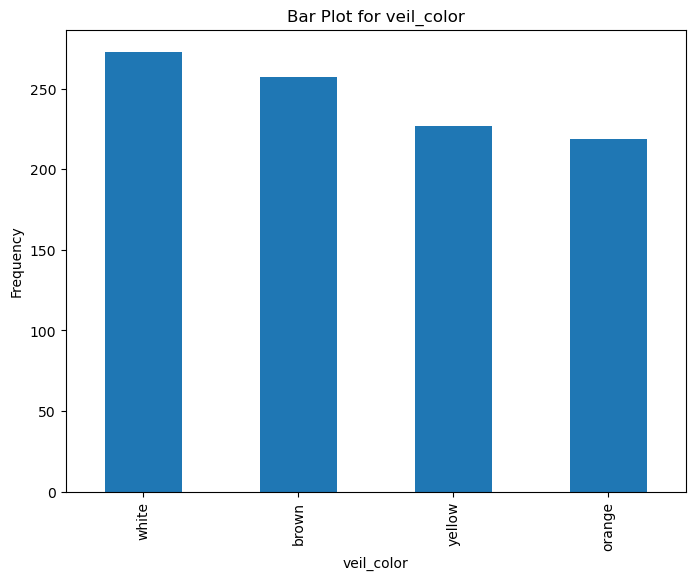

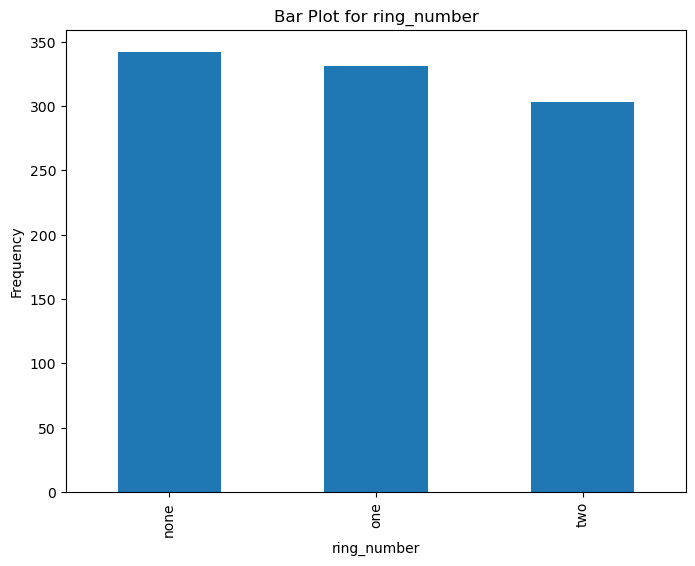

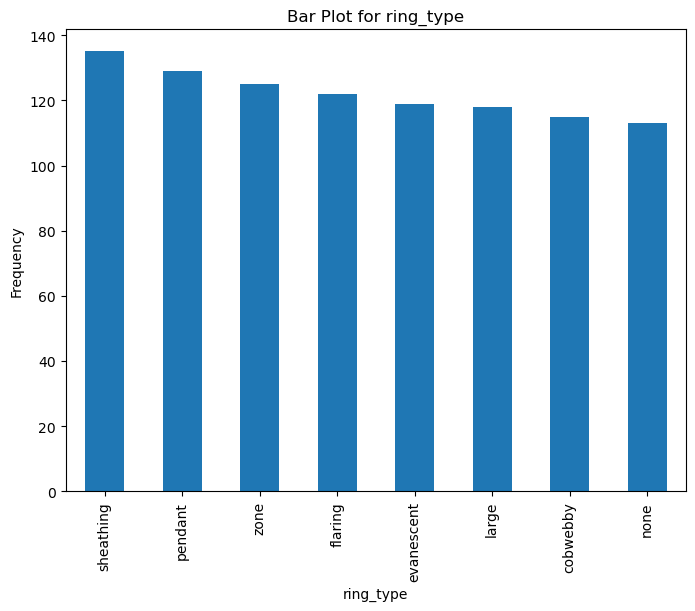

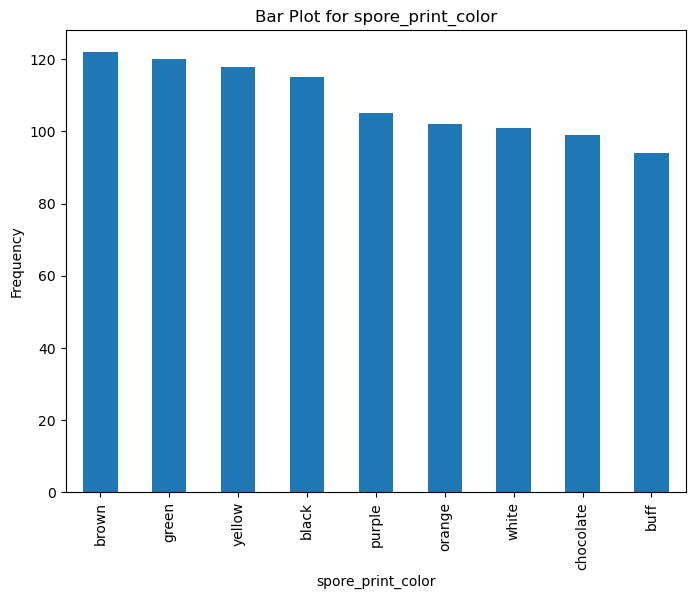

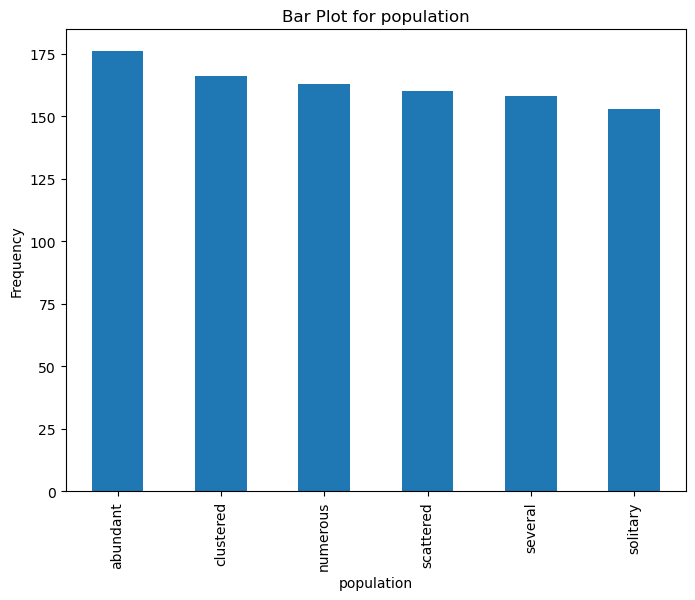

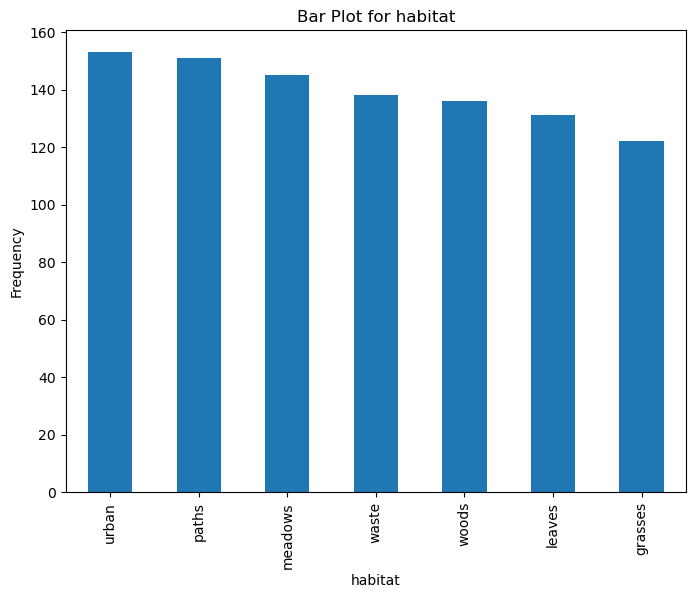

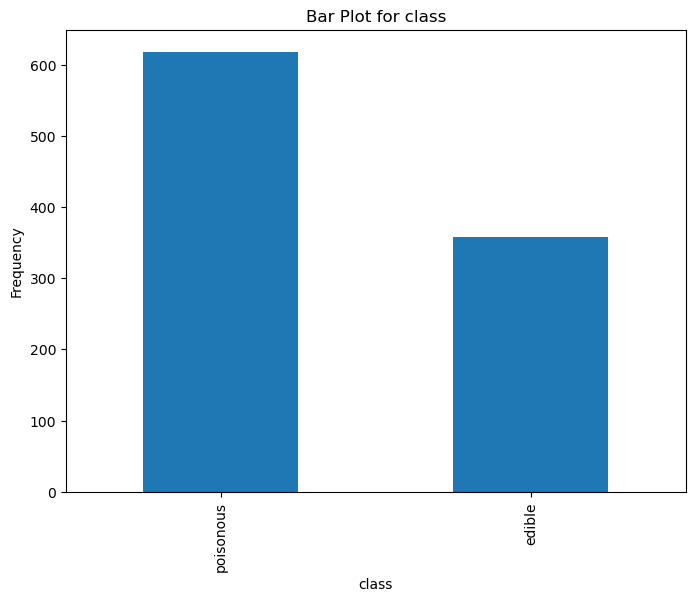

In [11]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Countplot for visualizing the feature distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

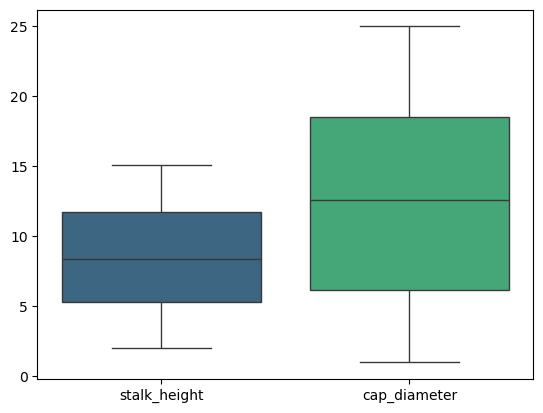

In [12]:
#to check if the numerical columns has any outliers 
sns.boxplot(data=df,palette='viridis')

In [13]:
df['cap_color'].value_counts()

brown     127
yellow    114
pink      112
red       110
green     108
gray      105
buff      104
purple    100
white      96
Name: cap_color, dtype: int64

# Data Preparation

In [14]:
# Separate features and target variable
X = df.drop(columns=['Unnamed: 0','class'])
y = df['class']
X,y

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
encoded_X = pd.get_dummies(X,columns=X.select_dtypes(include=['object']).columns,dtype=int)
encoded_X

In [ ]:
X = pd.DataFrame(encoded_X,columns=encoded_X.columns)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(encoded_X)
le = LabelEncoder()
y= le.fit_transform(y)

In [ ]:
X = pd.DataFrame(encoded_X,columns=encoded_X.columns)
y = pd.DataFrame(y,columns=['class'])
X,y

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train,X_test,y_train,y_test

<!-- SVM implementation and Analysis -->

# SVM Implementation and Analysis

In [ ]:
svc = SVC()

svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

In [ ]:
sns

In [ ]:
param = ['linear','rbf','poly','sigmoid']
for i in param:
    svc = SVC(kernel=i)
    svc.fit(X_train,y_train)
    ypred = svc.predict(X_test)
    print(f"accurracy for Kernel {i} on train data ={svc.score(X_train,y_train)}")
    print(f'accuracy for kernel {i} on test data ={svc.score(X_test,y_test)}')
    print()

In [ ]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
print("classification Report For Kernal 'poly' on svm is:")
print(classification_report(y_test,ypred))

- **Strengths:**

1. High Dimensionality Handling: SVMs can handle high-dimensional data well, which is beneficial since the mushroom dataset has many categorical features.
2. Effective for Non-Linear Boundaries: The RBF kernel, in particular, can effectively model complex boundaries between edible and poisonous mushrooms.
3. Flexibility in Kernel Choice: The ability to choose different kernels allows SVM to adapt to various types of data distributions.

- **Challenges:**

1. Scalability: SVMs are not ideal for very large datasets due to their computational complexity. Training time can increase significantly with the size of the dataset.
2. Parameter Tuning: Finding the right parameters (e.g., C, gamma) can be difficult and time-consuming.
3. Interpretability: SVM models, especially with non-linear kernels, are often considered black boxes, making them less interpretable compared to simpler models like decision trees.

- **Real-World Use Cases:**

1. Text Classification: SVMs perform well in classifying documents or emails as spam or not spam, sentiment analysis, etc.
2. Image Recognition: With the right kernel, SVM can effectively classify images, often used in face recognition.
3. Bioinformatics: SVMs are used for classifying genes, proteins, and other biological data, where the datasets are high-dimensional.